## **Proof of Linearity**

### **Introduction:**

The objective of this notebook is to ascertain whether the relationship between the dependent variable and the predictor variables adheres to the fundamental assumption of linearity in regression analysis.

The linearity assumption posits that the relationship between the dependent variable and the predictor variables should be linear. This assumption is paramount as it ensures the interpretability and reliability of the regression model. Deviations from linearity can lead to inaccurate predictions and biased parameter estimates.

To validate the linearity assumption, various diagnostic techniques can be employed. Some of these methods include:

#### Visual Inspection:

- **Scatter plots:** Plotting the dependent variable against each predictor variable to visually assess the linearity of the relationship.
- **Residual plots:** Plotting the residuals (observed - predicted values) against the predicted values to check for patterns or deviations from linearity.

#### Statistical Tests:

- **Rainbow test:** A statistical test that examines the linearity assumption by fitting a linear regression model to a subset of the data and comparing it to a full model. The null hypothesis is that the relationship is linear.
- **Cook-Weisberg test:** A test for linearity in heteroscedasticity-robust regression models that examines the relationship between the fitted values and squared residuals.
- **Ramsey RESET test:** A test for linearity in heteroscedasticity-robust regression models that examines the relationship between the fitted values and squared residuals.


In this notebook, the Linearity assumption will be validated using **Visual Inspection** and the **Rainbow Test**.

The `Rainbow test` test compares the fit of the model against a model that allows for a non-linear relationship (specifically, a polynomial of a given degree) between the dependent and independent variables.

**How it works:** Essentially, it segments the data into groups and fits the model separately to each group. Then, it compares the variance of these fits to the variance of the model fit to the entire dataset. A significant difference suggests that the model's assumption of linearity might not hold.

**Interpretation:** The output includes a `statistic` and a `p-value.` A `high p-value (typically > 0.05)` suggests that there is no evidence against linearity, meaning the linear model is an appropriate fit for the data.

In [12]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split

In [3]:
# Read the cleaned data into a dataframe
df = pd.read_csv('../data/cleaned_df.zip', compression='zip', index_col=0)
df.head()

,location,bath,balcony,price,House_size,new_total_sqft
2,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Kothanur,2.0,1.0,51.00,2.0,1200.0
8,Marathahalli,3.0,1.0,63.25,3.0,1310.0
10,Whitefield,2.0,2.0,70.00,3.0,1800.0


In [4]:
df['location'].value_counts(normalize=True).sort_values(ascending=False)


location
Whitefield                 0.044883
Sarjapur  Road             0.031732
Kanakpura Road             0.023728
Electronic City            0.022156
Uttarahalli                0.021298
                             ...   
Jakkasandra                0.000143
Adarsh Nagar               0.000143
Classic Paradise Layout    0.000143
Anathanagar                0.000143
Annaiah Reddy Layout       0.000143
Name: proportion, Length: 849, dtype: float64

### **Feature Engineering**

Considering the extensive variety of locations in the categorical column, `"location" ,`comprising over 800 unique values, employing **One-Hot Encoding** on this column would significantly amplify the dataset's dimensionality. This increase in dimensionality could lead to the *curse of dimensionality*, impeding model learning by creating an overly expansive feature space.

To address this concern, I intend to implement a function called `group_location`. This function will categorize locations that represent less than a predetermined threshold, typically set at 1% of the dataset, into a collective `"Other"` category. This approach aims to condense the categorical values, mitigating the adverse effects of high dimensionality and facilitating more effective model training.


In [5]:
def group_location(threshold= 0.01):
    '''
    This function takes in a threshold and groups the unique locations whose total number of
    rows/observations does not go meet the set threshold into the general category 'Other'.

    The function returns the result of the value_counts() method of the location column.

    Input:
    threshold - float between 0 and 1 

    Return:
    It returns the unique categories and the total number of values each unique category has


    '''
    counts = df['location'].value_counts(normalize=True)


    # Get the categories that represent less than set threshold
    other_categories = counts[counts < threshold].index

    # Replace these categorwies with 'Other' 
    df['location'] = df['location'].replace(other_categories, 'Other')

    return df['location'].value_counts()

In [6]:
group_location()

location
Other                    4971
Whitefield                314
Sarjapur  Road            222
Kanakpura Road            166
Electronic City           155
Uttarahalli               149
Thanisandra               136
Yelahanka                 133
Raja Rajeshwari Nagar     130
Marathahalli              116
Bannerghatta Road         108
Haralur Road              103
7th Phase JP Nagar        102
Hebbal                    101
Hennur Road                90
Name: count, dtype: int64

In [7]:
encoded_df = pd.get_dummies(df, drop_first=True)
encoded_df.head()

,bath,balcony,price,House_size,new_total_sqft,location_Bannerghatta Road,location_Electronic City,location_Haralur Road,location_Hebbal,location_Hennur Road,location_Kanakpura Road,location_Marathahalli,location_Other,location_Raja Rajeshwari Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka
2,2.0,3.0,62.00,3.0,1440.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,3.0,1.0,95.00,3.0,1521.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2.0,1.0,51.00,2.0,1200.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,3.0,1.0,63.25,3.0,1310.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
10,2.0,2.0,70.00,3.0,1800.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
# Filter columns that start with 'location_'
encoded_cols = encoded_df.filter(like='location_').columns

# Convert selected columns to integer data type
encoded_df[encoded_cols] = encoded_df[encoded_cols].astype(int)

encoded_df.head()

,bath,balcony,price,House_size,new_total_sqft,location_Bannerghatta Road,location_Electronic City,location_Haralur Road,location_Hebbal,location_Hennur Road,location_Kanakpura Road,location_Marathahalli,location_Other,location_Raja Rajeshwari Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka
2,2.0,3.0,62.00,3.0,1440.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.0,1.0,95.00,3.0,1521.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1.0,51.00,2.0,1200.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,3.0,1.0,63.25,3.0,1310.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10,2.0,2.0,70.00,3.0,1800.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
encoded_df.shape

encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6996 entries, 2 to 13317
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bath                            6996 non-null   float64
 1   balcony                         6996 non-null   float64
 2   price                           6996 non-null   float64
 3   House_size                      6996 non-null   float64
 4   new_total_sqft                  6996 non-null   float64
 5   location_Bannerghatta Road      6996 non-null   int32  
 6   location_Electronic City        6996 non-null   int32  
 7   location_Haralur Road           6996 non-null   int32  
 8   location_Hebbal                 6996 non-null   int32  
 9   location_Hennur Road            6996 non-null   int32  
 10  location_Kanakpura Road         6996 non-null   int32  
 11  location_Marathahalli           6996 non-null   int32  
 12  location_Other                  6996 n

In [13]:
# creating the dependent(y) and independent variables(X)
X = encoded_df.drop(columns='price')
y = encoded_df['price']

# Add a constant term for the intercept
X = sm.add_constant(X)  


# Fit the OLS model that includes an intercept term
model = sm.OLS(y, X).fit()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = model.predict(X_test)

residual = y_test - y_pred

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     187.6
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:22:49   Log-Likelihood:                -31980.
No. Observations:                6996   AIC:                         6.400e+04
Df Residuals:                    6977   BIC:                         6.413e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### **Residual Plot**

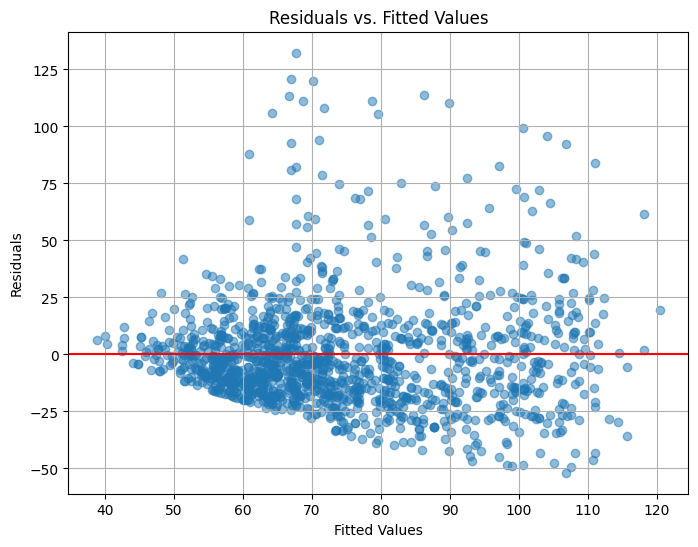

In [14]:
# Plot residuals against fitted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residual, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')  # Add zero residual line
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

#### **Q-Q Plot**

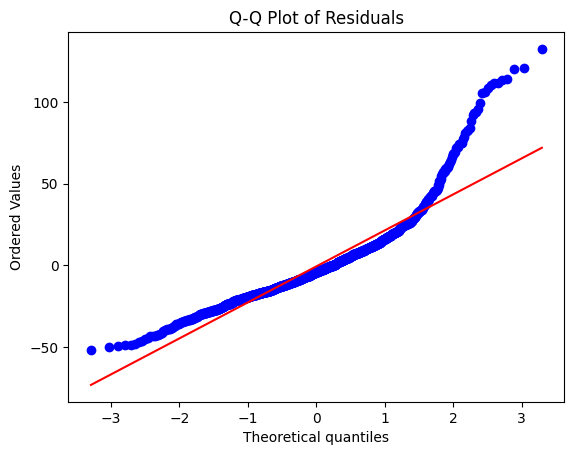

In [15]:
# Q-Q plot of residuals
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

##### **Rainbow Test**

In [21]:
# Perform Rainbow test for linearity
rainbow_statistic, rainbow_p_value = linear_rainbow(model, frac=0.5)
print("Rainbow Test Statistic:", rainbow_statistic)
print("Rainbow Test p-value:", rainbow_p_value)

Rainbow Test Statistic: 0.9555126048764044
Rainbow Test p-value: 0.910495196678123


#### **Observations**

**Residual Plot:** The residual plot shows a slight curvature, with residuals becoming increasingly positive or negative for higher fitted values. This suggests a potential violation of the homoscedasticity assumption, where the variance of the errors might not be constant across the range of predicted prices.

**Rainbow Test:**
- While the test statistic (0.9555) still indicates a positive correlation, it might not be entirely reliable due to the observed pattern in the residuals.
- The high p-value (0.9104) technically allows us to fail to reject linearity based on the test alone. However, the visual evidence from the residuals suggests further investigation might be needed.


### **Conclusion**

Although the rainbow test statistically fails to reject linearity, the non-random pattern observed in the residual plot raises some concerns about the homoscedasticity assumption. Here are some possible next steps:

- **Explore data transformations:** Consider transforming the target variable (house price) or some independent variables to achieve a more linear relationship and potentially achieve homoscedasticity.
- **Investigate alternative models:** Depending on the severity of the non-linearity in the residuals, exploring non-linear models like decision trees or random forests might be a good idea.
- **Perform additional diagnostics:** Analyze the distribution of the residuals and leverage scores to gain more insights into potential issues with the model.

It's important to weigh the results of the rainbow test along with the visual evidence from the residual plot. While the test might not statistically reject linearity, the observed pattern suggests potential issues that could affect the model's performance. Further investigation through data transformation, alternative models, or additional diagnostics can help you refine your house price prediction model.